In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

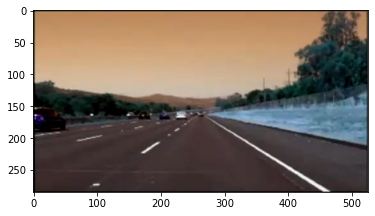

In [178]:
img = cv2.imread("/home/hero576/Desktop/lane.png")
img.dtype
plt.imshow(img)

In [179]:
img.shape

(285, 526, 3)

In [10]:
img = img*(255/np.max(img))
img.dtype

dtype('float64')

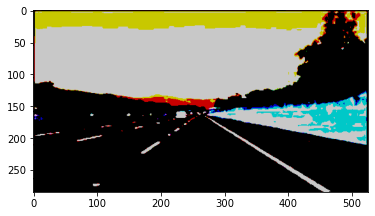

In [21]:
dst,thresh = cv2.threshold(img,100,200,cv2.THRESH_BINARY)
plt.imshow(thresh)

In [22]:
thresh

array([[[200, 200, 200],
        [200, 200, 200],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [200, 200, 200]],

       [[200,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [200,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[200, 200, 200],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[200, 200, 200],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[200, 200, 200],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [28]:
def get_m_minv():
    src = np.float32([[(60, 600), (520, 350), (540, 350), (1030, 600)]])
    dst = np.float32([[(500, 700), (500, 100), (600, 100), (600, 700)]])
    m = cv2.getPerspectiveTransform(src, dst)
    m_inv = cv2.getPerspectiveTransform(dst, src)
    return m, m_inv

In [29]:
get_m_minv()

(array([[-7.63358779e-02, -1.59083969e+00,  5.88854962e+02],
        [ 1.76600913e-15, -2.06717557e+00,  7.21984733e+02],
        [ 2.19149906e-18, -2.90076336e-03,  1.00000000e+00]]),
 array([[ 1.71935007e-01, -7.43279173e-01,  4.35391433e+02],
        [-5.21064673e-16, -4.83751846e-01,  3.49261448e+02],
        [-1.30175768e-18, -1.40324963e-03,  1.00000000e+00]]))

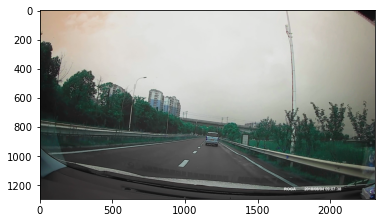

(1296, 2304, 3)

In [206]:
img = cv2.imread('/home/hero576/code/python/lane/data/002.jpg')
plt.imshow(img)
plt.show()
img.shape

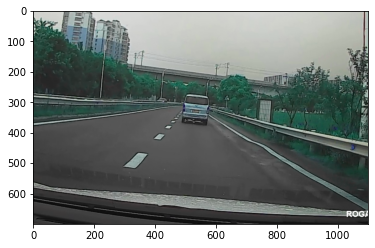

In [207]:
cut_img = img[560:1260, 650:1750]  # 560:1160
plt.imshow(cut_img)

(700, 1100, 3)


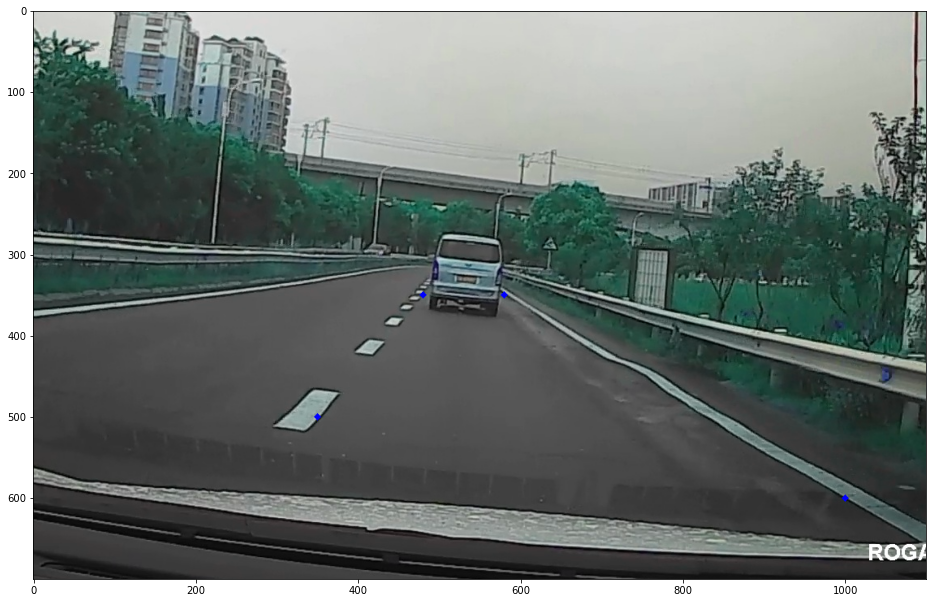

In [208]:
img_c = cut_img.copy()
cv2.circle(img_c,(350, 500),2,(0,0,255),3)
cv2.circle(img_c,(480, 350),2,(0,0,255),3)
cv2.circle(img_c,(580, 350),2,(0,0,255),3)
cv2.circle(img_c,(1000, 600),2,(0,0,255),3)
plt.figure(figsize=(16,16))
plt.imshow(img_c)
print(img_c.shape)

In [101]:
img_l.shape

(700, 1100, 3)

(700, 1100, 3)


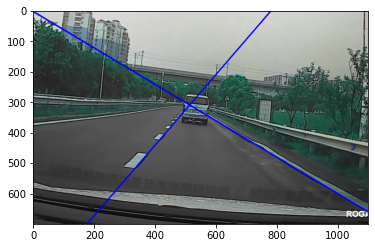

In [112]:
img_l = cut_img.copy()
l_p1 = 350, 500
l_p2 = 480, 350
r_p1 = 580, 350
r_p2 = 1000, 600

def k(p1,p2):
    return (p1[1]-p2[1])/(p1[0]-p2[0])

def b(p1,p2):
    return p1[1]- k(p1,p2)*p1[0]

def get_y(p1,p2,x):
    return int(k(p1,p2)*x+b(p1,p2))
def get_x(p1,p2,y):
    if abs(k(p1,p2))>0.0001:
        return int((y-b(p1,p2))/k(p1,p2))
    else:
        return np.isinf
lp1 = (get_x(l_p1,l_p2,img_l.shape[1]),img_l.shape[1])
lp2 = (get_x(l_p1,l_p2,0),0)
rp1 = (get_x(r_p1,r_p2,img_l.shape[1]),img_l.shape[1])
rp2 = (get_x(r_p1,r_p2,0),0)

cv2.line(img_l,lp1,lp2,(0,0,255),3)
cv2.line(img_l,rp1,rp2,(0,0,255),3)
plt.imshow(img_l)
print(img_l.shape)

In [117]:
def get_cross(k1,b1,k2,b2):
    if abs(k1-k2)<0.00001:
        return np.inf
    #k1*x+b1 = k2*x+b2
    x = (b2-b1)/(k1-k2)
    y = k1*x+b1
    return int(x),int(y)
    
cross = get_cross(k(l_p1,l_p2),b(l_p1,l_p2),k(r_p1,r_p2),b(r_p1,r_p2))
cross

(514, 310)

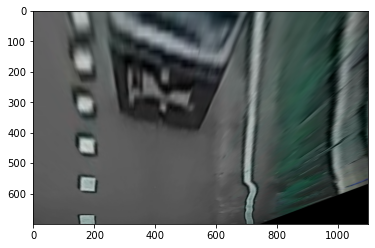

In [123]:
src = np.float32([[l_p1, l_p2, r_p1, r_p2]])
dst = np.float32([[(200, 700), (200, 100), (700, 100), (700, 700)]])
#src = np.float32([[(60, 600), (430, 350), (610, 350), (1030, 600)]])
#dst = np.float32([[(200, 700), (200, 100), (800, 100), (800, 700)]])

m = cv2.getPerspectiveTransform(src, dst)
m_inv = cv2.getPerspectiveTransform(dst, src)

wrap_img = cv2.warpPerspective(cut_img, m, cut_img.shape[1::-1], flags=cv2.INTER_LINEAR)
plt.imshow(wrap_img)

In [138]:
cut_img.shape[1::-1]

(1100, 700)

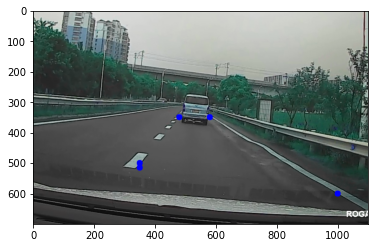

In [165]:
img_lp = cut_img.copy()
cv2.polylines(img_lp,np.array(((l_p1,),(l_p2,),(r_p1,),(r_p2,),(l_p1))),True,(0,0,255),20)
plt.imshow(img_lp)

In [139]:
l_p1,l_p2,r_p1,r_p2

((350, 500), (480, 350), (580, 350), (1000, 600))

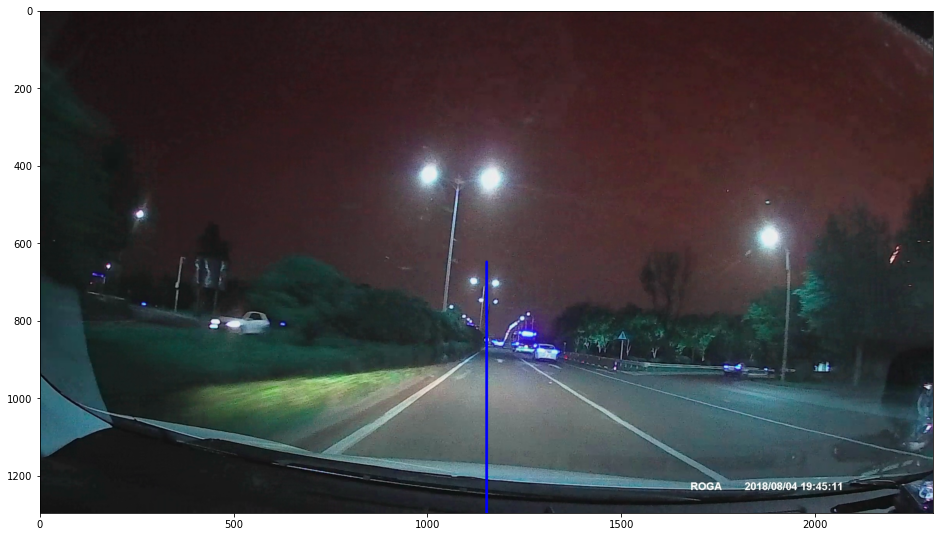

In [204]:
img = cv2.imread('/home/hero576/code/python/lane/data/001.jpg')
img_cp = img.copy()
h,w,_ = img_cp.shape
cv2.line(img_cp,(int(w/2),h),(int(w/2),int(h/2)),(0,0,255),6)
plt.figure(figsize=(16,16))
plt.imshow(img_cp)

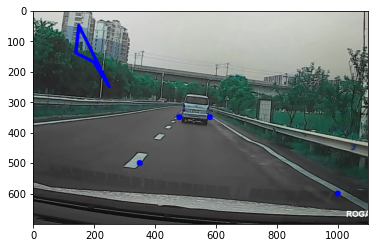

In [158]:
newImageInfo = (500,500,3)
points = np.array([[150,50],[140,140],[200,170],[250,250],[150,50]],np.int32)
points = points.reshape(-1,1,2)
cv2.polylines(img_lp,[points],True,(0,0,255),10)
plt.imshow(img_lp)


(1296, 2304, 3)


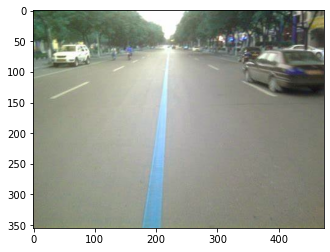

In [185]:
img = cv2.imread("/home/hero576/code/python/lane/data/lane_over.jpg")
img.dtype
plt.imshow(img)
img = cv2.resize(img,(2304,1296))
print(img.shape)

(700, 1100, 3)


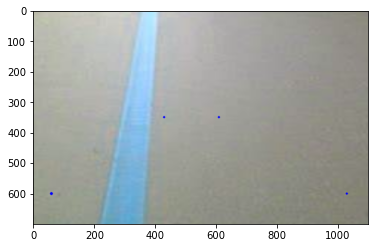

In [186]:
src = np.float32([[(60, 600), (430, 350), (610, 350), (1030, 600)]])
dst = np.float32([[(200, 700), (200, 100), (800, 100), (800, 700)]])
cut_img = img[560:1260, 650:1750]  # 560:1160
img_c = cut_img.copy()
cv2.circle(img_c,(60, 600),2,(0,0,255),6)
cv2.circle(img_c,(430, 350),2,(0,0,255),4)
cv2.circle(img_c,(610,350),2,(0,0,255),4)
cv2.circle(img_c,(1030, 600),2,(0,0,255),4)
plt.imshow(img_c)
print(img_c.shape)

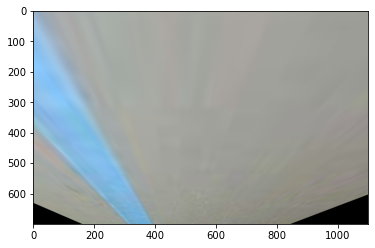

In [187]:

m = cv2.getPerspectiveTransform(src, dst)
m_inv = cv2.getPerspectiveTransform(dst, src)

wrap_img = cv2.warpPerspective(cut_img, m, cut_img.shape[1::-1], flags=cv2.INTER_LINEAR)
plt.imshow(wrap_img)

In [ ]:
img = cv2.imread('/home/hero576/code/python/lane/data/002.jpg')
plt.imshow(img)
plt.show()
img.shape

(700, 1100, 3)


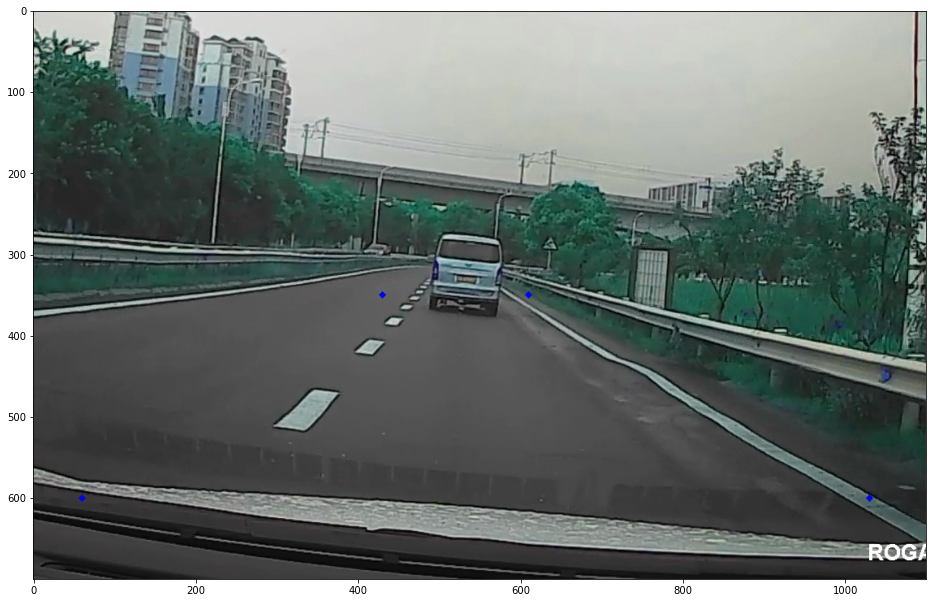

In [209]:
img_c = cut_img.copy()
#src = np.float32([[(60, 600), (430, 350), (610, 350), (1030, 600)]])
#dst = np.float32([[(200, 700), (200, 100), (800, 100), (800, 700)]])

cv2.circle(img_c,(60, 600),2,(0,0,255),3)
cv2.circle(img_c,(430, 350),2,(0,0,255),3)
cv2.circle(img_c,(610, 350),2,(0,0,255),3)
cv2.circle(img_c,(1030, 600),2,(0,0,255),3)
plt.figure(figsize=(16,16))
plt.imshow(img_c)
print(img_c.shape)